In [3]:
from pandas import read_csv
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# function to visualize confusion matrix

import itertools
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm, 3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Classe')
    plt.xlabel('Predicted Classe')

## Load Dataset

In [4]:
# load data
df = read_csv("speedDateM-dimred.csv")

## Dimension Reduction

In [5]:
df = df.dropna(how='any')    #to drop if any value in the row has a nan
df = df.drop("iid", axis = 1).drop("id", axis = 1).drop("idg", axis = 1).drop("gender", axis = 1).drop("wave", axis = 1)
# rename data attribute
df.columns = ['imp-phys-attr', 'imp-sinc', 'imp-intel', 'imp-fun', 'imp-amb', 'imp-shar',\
              'eval-phys-attr', 'eval-sinc', 'eval-intel','eval-fun','eval-amb',\
              'eval-shar', 'decision' ]

## Split into training set and test set

In [6]:
from sklearn.model_selection import train_test_split
target = df['decision']
feat = df.drop('decision', axis = 1)
train_x, test_x, train_y, test_y = train_test_split(feat, target, train_size = .8)

print("train x dimensions:", train_x.shape)
print("train y dimensions:", train_y.shape)
print("test x dimensions:", test_x.shape)
print("test y dimensions:", test_y.shape)

train x dimensions: (2836, 12)
train y dimensions: (2836,)
test x dimensions: (710, 12)
test y dimensions: (710,)


## Machine Learning Models

### Decision Tree

0.013810873031616211
Train accuracy:  1.00
Test accuracy:  0.73


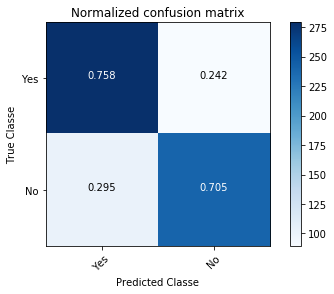

In [13]:
import time

dt = tree.DecisionTreeClassifier()
startTime = time.time()
dt.fit(train_x, train_y)
endTime = time.time()
print(endTime -startTime)
pred = dt.predict(test_x)

train_acc_dt = format(accuracy_score(train_y, dt.predict(train_x)), '.2f')
test_acc_dt = format(accuracy_score(test_y, pred), '.2f')
print("Train accuracy: ", train_acc_dt)
print("Test accuracy: ", test_acc_dt)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, pred)
np.set_printoptions(precision=2)

class_names = ['Yes','No']

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Random Forests

0.05236315727233887
train accuracy:  0.99
test accuracy:  0.80


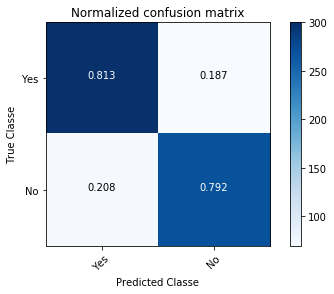

In [43]:
# Build random forest model
rf = RandomForestClassifier()
startTime = time.time()
rf.fit(train_x, train_y)
endTime = time.time()
print(endTime -startTime)
pred = rf.predict(test_x)

train_acc_rf = format(accuracy_score(train_y, rf.predict(train_x)), '.2f')
test_acc_rf = format(accuracy_score(test_y, pred), '.2f')
print("train accuracy: ", train_acc_rf)
print("test accuracy: ", test_acc_rf)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, pred)
np.set_printoptions(precision=2)

class_names = ['Yes','No']

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [7]:
input_vars = ['imp-phys-attr', 'imp-sinc', 'imp-intel', 'imp-fun', 'imp-amb', 'imp-shar',\
              'eval-phys-attr', 'eval-sinc', 'eval-intel','eval-fun','eval-amb',\
              'eval-shar', 'decision' ]
ranking = np.argsort(rf.feature_importances_)
feature_ranking=[0]*len(ranking)
for i in range(len(ranking)):
    order = ranking[i]
    feature_ranking[order] = len(ranking) - i
feature_ranking = zip(feature_ranking, input_vars)
list(feature_ranking)

[(4, 'imp-phys-attr'),
 (6, 'imp-sinc'),
 (8, 'imp-intel'),
 (7, 'imp-fun'),
 (10, 'imp-amb'),
 (5, 'imp-shar'),
 (1, 'eval-phys-attr'),
 (11, 'eval-sinc'),
 (12, 'eval-intel'),
 (2, 'eval-fun'),
 (9, 'eval-amb'),
 (3, 'eval-shar')]

# Build model on evaluation attributes

## Dimension Reduction

In [8]:
df_eval = df.drop("imp-phys-attr", axis = 1).drop("imp-sinc", axis = 1).drop("imp-amb", axis = 1).\
    drop("imp-shar", axis = 1).drop("imp-intel", axis = 1).drop("imp-fun", axis = 1)

## Split data set into training set and test set

In [9]:
from sklearn.model_selection import train_test_split
target = df_eval['decision']
feat = df_eval.drop('decision', axis = 1)
train_eval_x, test_eval_x, train_eval_y, test_eval_y = train_test_split(feat, target, train_size = .8)
print("train x dimensions:", train_eval_x.shape)
print("train y dimensions:", train_eval_y.shape)
print("test x dimensions:", test_eval_x.shape)
print("test y dimensions:", test_eval_y.shape)

train x dimensions: (2836, 6)
train y dimensions: (2836,)
test x dimensions: (710, 6)
test y dimensions: (710,)


## Machine Learning Models

### Decision Trees Classifier

train accuracy:  0.95
test accuracy:  0.67


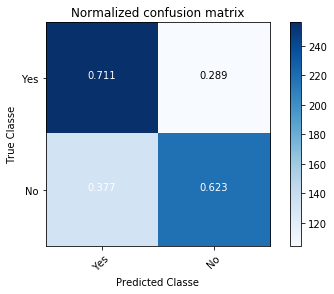

In [197]:
from sklearn import tree
dt_eval = tree.DecisionTreeClassifier()
dt_eval.fit(train_eval_x, train_eval_y)
pred = dt_eval.predict(test_eval_x)

train_acc_eval_dt = format(accuracy_score(train_eval_y, dt_eval.predict(train_eval_x)), '.2f')
test_acc_eval_dt = format(accuracy_score(test_eval_y, pred), '.2f')
print("train accuracy: ", train_acc_eval_dt)
print("test accuracy: ", test_acc_eval_dt)

cnf_matrix = confusion_matrix(test_eval_y, pred)
np.set_printoptions(precision=2)

class_names = ['Yes','No']

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Random Forests Classifier

train accuracy:  0.94
test accuracy:  0.71


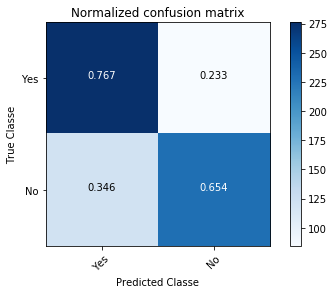

In [198]:
rf_eval = RandomForestClassifier()
rf_eval.fit(train_eval_x, train_eval_y)
pred = rf_eval.predict(test_eval_x)

train_acc_eval_rf = format(accuracy_score(train_eval_y, rf_eval.predict(train_eval_x)), '.2f')
test_acc_eval_rf = format(accuracy_score(test_eval_y, pred), '.2f')
print("train accuracy: ", train_acc_eval_rf)
print("test accuracy: ", test_acc_eval_rf)

cnf_matrix = confusion_matrix(test_eval_y, pred)
np.set_printoptions(precision=2)

class_names = ['Yes','No']

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Accuracy of Models and Types of data

### Train Accuracy

In [199]:
from IPython.display import HTML, display

data = [["","Decision Trees","Random Forests"],
        ["Importance and evaluation attributes", train_acc_dt, train_acc_rf],
        ["Evaluation attributes", train_acc_eval_dt, train_acc_eval_rf]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
    '</tr><tr>'.join(
        '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))
))

,Decision Trees,Random Forests
Importance and evaluation attributes,1.00,0.98
Evaluation attributes,0.95,0.94


### Test accuracy

In [201]:
data = [["","Decision Trees","Random Forests"],
        ["Importance and evaluation attributes", test_acc_dt, test_acc_rf],
        ["Evaluation attributes", test_acc_eval_dt, test_acc_eval_rf]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
    '</tr><tr>'.join(
        '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))
))

,Decision Trees,Random Forests
Importance and evaluation attributes,0.75,0.78
Evaluation attributes,0.67,0.71


### Important points

1. Decision Tree has lower accuracy than Random Forest. 
2. Evaluation attributes have strong indication of dating decision 

Since the evaluation attributes have strong indication of dating decision, we focus on evaluation attributes to rank the importance of features

## Ranking of important features

In [202]:
# Feature array
input_vars = ['eval-phys-attr', 'eval-sinc', 'eval-intel','eval-fun','eval-amb',\
              'eval-shar']

### Random Forests

In [203]:
ranking = np.argsort(rf_eval.feature_importances_)
feature_ranking=[0]*len(ranking)
for i in range(len(ranking)):
    order = ranking[i]
    feature_ranking[order] = len(ranking) - i
feature_ranking = zip(feature_ranking, input_vars)
list(feature_ranking)

[(1, 'eval-phys-attr'),
 (5, 'eval-sinc'),
 (6, 'eval-intel'),
 (3, 'eval-fun'),
 (4, 'eval-amb'),
 (2, 'eval-shar')]

## Conclusion

3 most important features: 

1. Physical Attractiveness
2. Shared Interests
3. Fun

In [204]:
# Use only 3 most important attributes to train model

df_imp_features = df_eval.drop("eval-sinc", axis = 1).drop("eval-intel", axis = 1).drop("eval-amb", axis = 1)

,eval-phys-attr,eval-fun,eval-shar,decision
0,6.0,8.0,6.0,0
1,8.0,9.0,4.0,0
2,7.0,5.0,4.0,0
3,6.0,7.0,5.0,0
4,6.0,8.0,6.0,0
5,7.0,9.0,4.0,0
6,7.0,8.0,7.0,0
7,8.0,6.0,5.0,0
8,6.0,8.0,5.0,0
9,7.0,8.0,5.0,0


In [205]:
from sklearn.model_selection import train_test_split
target = df_imp_features['decision']
feat = df_imp_features.drop('decision', axis = 1)
train_if_x, test_if_x, train_if_y, test_if_y = train_test_split(feat, target, train_size = .8)
print("train x dimensions:", train_if_x.shape)
print("train y dimensions:", train_if_y.shape)
print("test x dimensions:", test_if_x.shape)
print("test y dimensions:", test_if_y.shape)

train x dimensions: (2836, 3)
train y dimensions: (2836,)
test x dimensions: (710, 3)
test y dimensions: (710,)


train accuracy:  0.78
test accuracy:  0.74


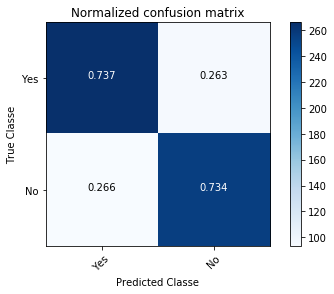

In [206]:
rf_imp_features = RandomForestClassifier()
rf_imp_features.fit(train_if_x, train_if_y)
pred = rf_imp_features.predict(test_if_x)

train_if_rf = format(accuracy_score(train_if_y, rf_imp_features.predict(train_if_x)), '.2f')
test_if_rf = format(accuracy_score(test_if_y, pred), '.2f')
print("train accuracy: ", train_if_rf)
print("test accuracy: ", test_if_rf)

cnf_matrix = confusion_matrix(test_if_y, pred)
np.set_printoptions(precision=2)

class_names = ['Yes','No']

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()